In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#objective function definition
def fitness(x):
    return (x)**2.0

[-1.00000000e+01 -9.90000000e+00 -9.80000000e+00 -9.70000000e+00
 -9.60000000e+00 -9.50000000e+00 -9.40000000e+00 -9.30000000e+00
 -9.20000000e+00 -9.10000000e+00 -9.00000000e+00 -8.90000000e+00
 -8.80000000e+00 -8.70000000e+00 -8.60000000e+00 -8.50000000e+00
 -8.40000000e+00 -8.30000000e+00 -8.20000000e+00 -8.10000000e+00
 -8.00000000e+00 -7.90000000e+00 -7.80000000e+00 -7.70000000e+00
 -7.60000000e+00 -7.50000000e+00 -7.40000000e+00 -7.30000000e+00
 -7.20000000e+00 -7.10000000e+00 -7.00000000e+00 -6.90000000e+00
 -6.80000000e+00 -6.70000000e+00 -6.60000000e+00 -6.50000000e+00
 -6.40000000e+00 -6.30000000e+00 -6.20000000e+00 -6.10000000e+00
 -6.00000000e+00 -5.90000000e+00 -5.80000000e+00 -5.70000000e+00
 -5.60000000e+00 -5.50000000e+00 -5.40000000e+00 -5.30000000e+00
 -5.20000000e+00 -5.10000000e+00 -5.00000000e+00 -4.90000000e+00
 -4.80000000e+00 -4.70000000e+00 -4.60000000e+00 -4.50000000e+00
 -4.40000000e+00 -4.30000000e+00 -4.20000000e+00 -4.10000000e+00
 -4.00000000e+00 -3.90000

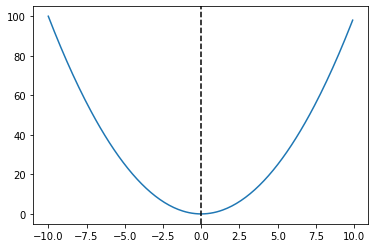

In [14]:
xMin, xMax = -10.0, 10.0
inputs = np.arange(xMin, xMax, 0.1)
print(inputs)
results = fitness(inputs)
plt.plot(inputs, results)

#optimal value
xOptimal = 0.0
plt.axvline(x=xOptimal, ls='--', color='k')
plt.show()

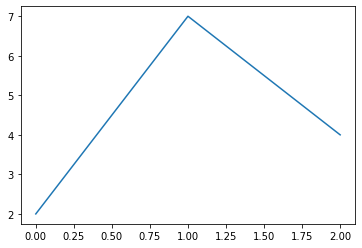

In [12]:
plt.plot([2,7,4])
plt.show()

In [21]:
def simulatedAnnealing(initialT, alpha, nIter, finalT):
    temp = initialT
    #generate initial solution
    currentSolution = np.random.randn() * 10
    bestSolution = currentSolution

    ##Uncomment for section 3.c
    solutions = np.array([])
    solutions = np.append(solutions, currentSolution)

    ##Uncomment for section 3.c
    temperatures = np.array([])
    temperatures = np.append(temperatures, initialT)

    while temp >= finalT:
        for i in range(nIter):
            neighbourSolution = currentSolution + np.random.randn()
            delta = fitness(neighbourSolution) - fitness(currentSolution)
            metropolis = np.exp(-delta / temp)
            if np.random.rand() < metropolis or delta < 0:
                currentSolution = neighbourSolution
                if fitness(currentSolution) < fitness(bestSolution):
                  bestSolution = currentSolution

        temp = alpha * temp

        ##Uncomment for sections 3.c
        solutions = np.append(solutions, currentSolution)
        temperatures = np.append(temperatures, temp)

    ##Uncomment for sections 3.c (and comment the last return, respectively)
    return bestSolution, solutions, temperatures
    # return bestSolution

In [22]:
def tabuSearch(neighbourhoodSize, criteria):
    initialSolution = np.random.randn() * 10
    bestSolution = initialSolution
    #print(initialSolution)

    tabuList = np.array([])
    tabuList = np.append(tabuList, initialSolution)

    while True:
        neighbours = np.zeros(neighbourhoodSize)
        for j in range(neighbourhoodSize):
            neighbours[j] = bestSolution + np.random.randn()

        candidateSolution = neighbours[0]
        for i in range(1, neighbourhoodSize):
            delta = fitness(neighbours[i]) - fitness(candidateSolution)
            if (neighbours[i] not in tabuList) and (delta < 0):
                candidateSolution = neighbours[i]

        bestSolution = candidateSolution
        #print(bestSolution)
        tabuList = np.append(tabuList, candidateSolution)

        if fitness(bestSolution) < criteria:
            break

    return bestSolution

In [23]:
np.random.seed(999)

initialT = 1e+01
alpha = 0.9
nIter = 100
finalT = 1e-05

best = simulatedAnnealing(initialT, alpha, nIter, finalT)
print('Returned solution: f(%s) = %f' % (best, fitness(best)))

TypeError: unsupported operand type(s) for ** or pow(): 'tuple' and 'float'

In [34]:
np.random.seed(55)
neighbourhoodSize = 50
criteria = 1e-10
bestSolution = tabuSearch(neighbourhoodSize, criteria)
print('Returned solution: f(%s) = %f' % (bestSolution, fitness(bestSolution)))

Returned solution: f(-2.755038726932478e-06) = 0.000000


In [24]:
np.random.seed(999)

initialT = 1e+01
alpha = 0.9
nIter = 100
finalT = 1e-05

#Uncomment indicated lines in simulatedAnnealing function (and rerun)
best, solutions, temperatures = simulatedAnnealing(initialT, alpha, nIter, finalT)
print('Returned solution: f(%s) = %f' % (best, fitness(best)))

Returned solution: f(0.0002901432728151) = 0.000000


1.4110627034080592


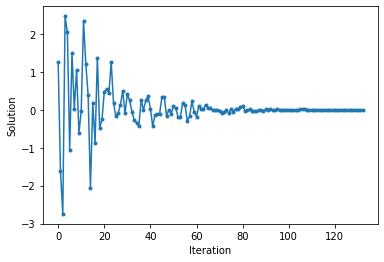

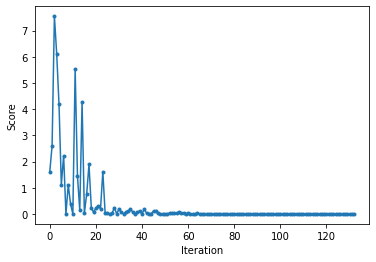

In [32]:

#Plotting the solutions
plt.plot(solutions, ".-")
plt.xlabel("Iteration")
plt.ylabel("Solution")
plt.show()

#Plotting the scores
scores = fitness(solutions)
plt.plot(scores, ".-")
plt.xlabel("Iteration")
plt.ylabel("Score")
plt.show()

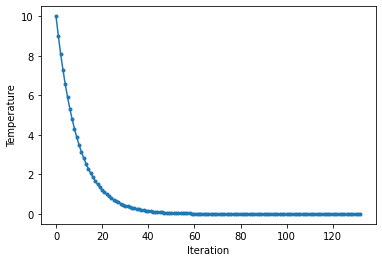

In [26]:
plt.plot(temperatures, ".-")
plt.xlabel("Iteration")
plt.ylabel("Temperature")
plt.show()